<a href="https://colab.research.google.com/github/Rishabh5174/LGMVIP-DataScience/blob/main/Stock_price_prediction%26forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name: Rishabh Kumar Addya**

**Task Level: Beginner**

**Task: Stock Price Prediction and Forecasting using Stacked LSTM**

**Dataset Link: https://www.canva.com/link?target=https%3A%2F%2Fraw.githubusercontent.com%2Fmwitiderrick%2Fstockprice%2Fmaster%2FNSE-TATAGLOBAL.csv&design=DAEjrwWV35w**

In [118]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

In [119]:
df.head(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
5,2018-09-21,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
6,2018-09-19,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
7,2018-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
8,2018-09-17,233.15,238.00,230.25,236.40,236.60,3170894,7445.41
9,2018-09-14,223.45,236.70,223.30,234.00,233.95,6377909,14784.50


In [120]:
df.tail(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2025,2010-08-03,118.3,119.95,117.90,118.65,118.30,611234,726.78
2026,2010-08-02,117.3,118.50,116.60,118.10,117.30,663593,779.85
2027,2010-07-30,116.5,118.00,114.60,115.85,116.05,2656191,3112.68
2028,2010-07-29,112.5,121.70,112.50,117.50,116.60,2359134,2791.03
2029,2010-07-28,118.0,120.50,117.20,118.15,118.25,835593,994.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [184]:
df=df.sort_values(by='Date',ascending=True) # sorting the data according to date

In [176]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


In [169]:
df.shape

(2035, 8)

**Some basic information about the dataset**

In [177]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

There is no null values.

In [178]:
df.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2035 entries, 2034 to 0
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 143.1+ KB


In [173]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


**We only take 'close' column and this particular price will be doing stock prediction**

In [180]:
#picked up the 'close' columns and resest it's index
df1=df.reset_index()['Close']

In [181]:
df1.shape

(2035,)

In [185]:
df1

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

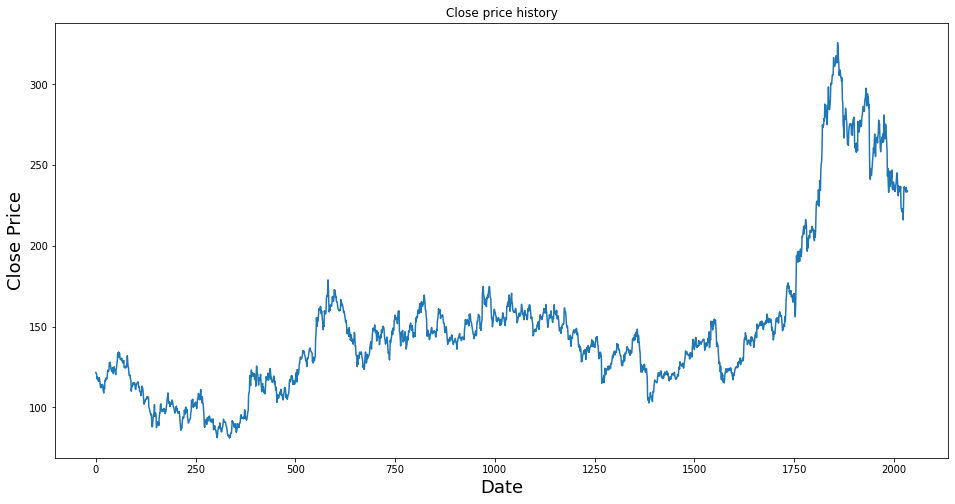

In [183]:
# Visualising the closing price history
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.title('Close price history')
plt.plot(df1)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()

**LSTM are sensitive to the scale of the data.So we apply MinMaxScaler(For normalization)**

In [186]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1)) # normalize all the values in between 0 to 1 
df1=scaler.fit_transform(np.array(df1).reshape(-1,1)) # It will show the dataset as an array

In [187]:
df1.shape

(2035, 1)

In [188]:
df1

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

**Preprocessing of the dataset**

***Splitting the dataset into train and test split***

In [189]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [190]:
training_size,test_size

(1322, 713)

In [191]:
train_data

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.19546569],
       [0.18280229],
       [0.19178922]])

In [192]:
# covert an array of values into a dataset matrix
import numpy as np
def create_dataset(dataset,time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0] ###i=0,0,1,2,3,.....,99 100
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX),np.array(dataY) 

In [193]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step=100
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)

In [194]:
print(x_train)

[[0.16584967 0.16319444 0.1621732  ... 0.14011438 0.13848039 0.12479575]
 [0.16319444 0.1621732  0.14971405 ... 0.13848039 0.12479575 0.12254902]
 [0.1621732  0.14971405 0.15400327 ... 0.12479575 0.12254902 0.13010621]
 ...
 [0.19669118 0.19505719 0.20996732 ... 0.20751634 0.20751634 0.19219771]
 [0.19505719 0.20996732 0.21098856 ... 0.20751634 0.19219771 0.18341503]
 [0.20996732 0.21098856 0.21568627 ... 0.19219771 0.18341503 0.19546569]]


In [195]:
print(x_train.shape)

(1221, 100)


In [196]:
print(y_train)

[0.12254902 0.13010621 0.13541667 ... 0.18341503 0.19546569 0.18280229]


In [197]:
print(y_train.shape)

(1221,)


*Reshaping input to be[samples,time_steps,features] which is required for LSTM*

In [198]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

**Create the Stacked LSTM model**

In [199]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [200]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [201]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_10 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
lstm_11 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [202]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 10s 252ms/step - loss: 0.0105 - val_loss: 0.0197
Epoch 2/100
20/20 [==============================] - 4s 197ms/step - loss: 0.0016 - val_loss: 0.0047
Epoch 3/100
20/20 [==============================] - 4s 195ms/step - loss: 9.2568e-04 - val_loss: 0.0058
Epoch 4/100
20/20 [==============================] - 4s 197ms/step - loss: 9.0194e-04 - val_loss: 0.0045
Epoch 5/100
20/20 [==============================] - 4s 197ms/step - loss: 8.6681e-04 - val_loss: 0.0045
Epoch 6/100
20/20 [==============================] - 4s 196ms/step - loss: 8.3209e-04 - val_loss: 0.0045
Epoch 7/100
20/20 [==============================] - 4s 197ms/step - loss: 7.7483e-04 - val_loss: 0.0039
Epoch 8/100
20/20 [==============================] - 4s 195ms/step - loss: 7.5558e-04 - val_loss: 0.0049
Epoch 9/100
20/20 [==============================] - 4s 195ms/step - loss: 7.5783e-04 - val_loss: 0.0035
Epoch 10/100
20/20 [==============================] - 4s 193ms

In [203]:
import tensorflow as tf
tf.__version__

'2.6.0'

*Lets do the prediction and check performance matrics*

In [204]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [205]:
# Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

*RMSE performance Matrics*

In [206]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

135.96250387324352

In [207]:
#### Test data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

201.7663040681721

**Plotting**

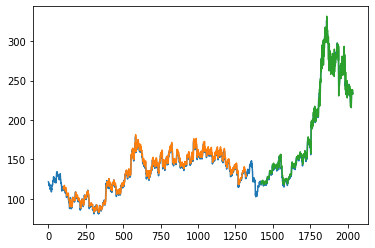

In [208]:
# shift train predictions for plotting
look_back=100
trainPredictPlot=np.empty_like(df1)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict
#shift test predictions for plotting
testPredictPlot=np.empty_like(df1)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict
# plot baseline and prediction
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

1. Green line show the predicted output of test data.

2. Blue line show the complete dataset.

**Predict the future 30 days and plot the output**

In [209]:
len(test_data)

713

In [210]:
x_input=test_data[613:].reshape(1,-1)
x_input.shape

(1, 100)

In [211]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [212]:
temp_input

[0.8527369281045751,
 0.8621323529411764,
 0.8345588235294117,
 0.84375,
 0.7146650326797386,
 0.6605392156862745,
 0.6542075163398693,
 0.6803513071895424,
 0.6689133986928104,
 0.6642156862745099,
 0.678921568627451,
 0.6913807189542482,
 0.7089460784313726,
 0.7226307189542485,
 0.7340686274509802,
 0.7212009803921569,
 0.749795751633987,
 0.7689950980392157,
 0.7446895424836601,
 0.7120098039215685,
 0.7467320261437909,
 0.7549019607843137,
 0.7604166666666667,
 0.7598039215686274,
 0.7465277777777777,
 0.7624591503267975,
 0.7706290849673203,
 0.8041258169934642,
 0.7810457516339868,
 0.7941176470588236,
 0.7602124183006536,
 0.7348856209150327,
 0.7240604575163399,
 0.7399918300653596,
 0.749795751633987,
 0.7614379084967322,
 0.7542892156862746,
 0.7475490196078431,
 0.769607843137255,
 0.7495915032679739,
 0.8171977124183007,
 0.8020833333333335,
 0.7773692810457518,
 0.7571486928104576,
 0.7937091503267975,
 0.7916666666666667,
 0.7714460784313726,
 0.7526552287581698,
 0.7269

Demonstrate prediction for next 30 days

In [213]:
from numpy import array

In [214]:
lst_output=[]
n_steps=100
i=0
while(i<30):
  if (len(temp_input)>100):
    #print (temp_input)
    x_input=np.array(temp_input[1:])
    print('{} day input {}'.format(i,x_input))
    x_input=x_input.reshape(1,-1)
    x_input=x_input.reshape((1,n_steps,1))
    #print(x_input)
    yhat=model.predict(x_input, verbose=0)
    print('{} day output {}'.format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    # print(temp_input)
    lst_output.extend(yhat.tolist())
    i=i+1
  else:
    x_input=x_input.reshape((1,n_steps,1))
    yhat=model.predict(x_input,verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i=i+1
print(lst_output)

[0.62874424]
101
1 day input [0.86213235 0.83455882 0.84375    0.71466503 0.66053922 0.65420752
 0.68035131 0.6689134  0.66421569 0.67892157 0.69138072 0.70894608
 0.72263072 0.73406863 0.72120098 0.74979575 0.7689951  0.74468954
 0.7120098  0.74673203 0.75490196 0.76041667 0.75980392 0.74652778
 0.76245915 0.77062908 0.80412582 0.78104575 0.79411765 0.76021242
 0.73488562 0.72406046 0.73999183 0.74979575 0.76143791 0.75428922
 0.74754902 0.76960784 0.7495915  0.81719771 0.80208333 0.77736928
 0.75714869 0.79370915 0.79166667 0.77144608 0.75265523 0.72691993
 0.6629902  0.68198529 0.64419935 0.62152778 0.6439951  0.66319444
 0.67544935 0.63705065 0.64603758 0.65890523 0.65870098 0.67790033
 0.63194444 0.63112745 0.62785948 0.64767157 0.63991013 0.63480392
 0.63868464 0.62336601 0.62745098 0.63970588 0.64705882 0.66196895
 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634  0.62254902
 0.62745098 0.63337418 0.62642974 0.63623366 0.58312908 0.57781863
 0.57230392 0.58006536 0.57618464

In [215]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [216]:
len(df1)

2035

In [217]:
df2=df1.tolist()
df2.extend(lst_output)

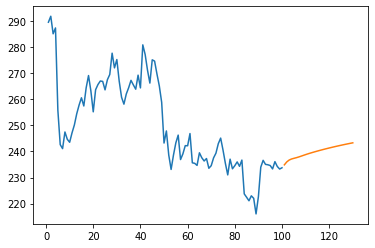

In [220]:
plt.plot(day_new,scaler.inverse_transform(df1[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

**These orange line basically shows the new(forecast) 30 days output.**

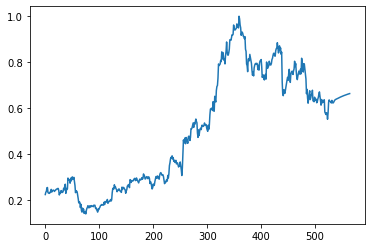

In [223]:
df2=df1.tolist()
df2.extend(lst_output)
plt.plot(df2[1500:])

**This is the complete graph where you can see the tail part(the new 30 days output) is actually augment with our previous one.**

**These is all about our stock price prediction and forecasting using stacked LSTM**